Fatemeh Mohammadi  
810199489

# Introduction:

- **Objective**:
  Familiarization with machine learning techniques for predicting house prices in Boston.

-  **Goals:**
    1. **Data Analysis**: Understand data distributions and statistical features.
    2. **Data Preprocessing**: Clean and prepare data for machine learning models.
    3. **Model Evaluation**: Apply models like Linear Regression and Decision Trees.
    4. **Ensemble Methods**: Combine models to improve prediction accuracy.

- **Dataset Features**:  
The dataset provided contains information about housing prices in Boston along with the features of the houses. In this exercise, we want to analyze the features, understand the criteria and dependencies, and be able to predict housing prices based on their features.

Here's a table explaining the columns of this dataset:

| Column | Description |
|--------|-------------|
| `CRIM` | Per capita crime rate by town |
| `ZN` | Proportion of residential land zoned for lots over 25,000 sq. ft. |
| `INDUS` | Proportion of non-retail business acres per town |
| `CHAS` | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| `NOX` | Nitric oxides concentration (parts per 10 million) |
| `RM` | Average number of rooms per dwelling |
| `AGE` | Proportion of owner-occupied units built before 1940 |
| `DIS` | Weighted distances to five Boston employment centers |
| `RAD` | Index of accessibility to radial highways |
| `TAX` | Full-value property tax rate per $10,000 |
| `PTRATIO` | Pupil-teacher ratio by town |
| `B` | 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town |
| `LSTAT` | Percentage of lower status of the population |
| `MEDV` | Median value of owner-occupied homes in 1,000s (Target Variable) |

**Note:**
- The target column for predicting housing prices is `MEDV`.


# Implementation 

## Part 0: Import Libraries  and Load Datast

### 0.1: Import Libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

### 0.2: Load Dataset

In [2]:
file_path = 'DataSet.xlsx'
df = pd.read_excel(file_path)

In [3]:
feature_colors = sns.color_palette('hls', n_colors=len(df.columns))
features = df.columns
feature_color_map = dict(zip(features, feature_colors))
feature_colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5940571428571428, 0.33999999999999997),
 (0.86, 0.8169142857142857, 0.33999999999999997),
 (0.6802285714285714, 0.86, 0.33999999999999997),
 (0.4573714285714283, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.4454857142857142),
 (0.33999999999999997, 0.86, 0.6683428571428571),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6059428571428571, 0.86),
 (0.33999999999999997, 0.3830857142857143, 0.86),
 (0.5197714285714281, 0.33999999999999997, 0.86),
 (0.7426285714285714, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7545142857142858),
 (0.86, 0.33999999999999997, 0.531657142857143)]

## Part 1: Data Analysis and Familiarization  
When we start a machine learning project, the data we initially work with is often raw. Thus, we need to analyze it to gain an overall understanding and familiarize ourselves with its features.

The initial phase of data analysis is often referred to as **Exploratory Data Analysis (EDA)**.

To implement this phase,we will follow the steps below:  
**1. Obtain the Overall Structure of the Data**  
**2. Identify Missing Data**  
**3. Plot the Count of Unique Values for Each Feature**  
**4. Plot the Dependencies of the Features**  
**5. Hexbin and Scatter Plots**    
**6. Further Analysis**  

### 1.1: Obtain the Overall Structure of the Data 

In [4]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7     NaN   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.380364    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  479.000000  506.000000  506.000000  506.000000  486.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.820947   
std     33.104049    6.527286  203.542157  180.670077   87.585243  121.174519   
min      1.137000    1.129600    1.000000   20.200000    2.600000    0.320000   
25%     32.000000    2.425900    4.000000  254.000000   17.000000  370.415000   
50%     65.250000    3.917500    5.000000  307.000000   18.900000  390.885000   
75%     89.975000    6.341400   24.000000  403.000000   20.200000  395.630000   
max    100.000000   24.000000  666.000000  711.000000  396.900000  396.900000   

            LSTAT        MEDV  
count  506.000000  452.000000  
mean    11.537806   23.750442  
std      6.064932    8.808602  
min      1.730000    6.300000  
25%      6.877500   18.500000  
50%     10.380000   21.950000  
75%     15.015000   26.600000  
max     34.410000   50.000000

#### Summary of Data Structure Analysis
After examining the dataset using `.info()`, `.head()`, and `.describe()`, we can summarize the following insights:

##### Dataset Overview
- **Total Entries:** 506
- **Total Columns:** 14


### 1.2: Identify Missing Data

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("\nMissing values and percentages:")
missing_info


Missing values and percentages:


Missing Values  Percentage
CRIM                  0    0.000000
ZN                    0    0.000000
INDUS                 0    0.000000
CHAS                 26    5.138340
NOX                   0    0.000000
RM                    0    0.000000
AGE                   0    0.000000
DIS                  27    5.335968
RAD                   0    0.000000
TAX                   0    0.000000
PTRATIO               0    0.000000
B                    20    3.952569
LSTAT                 0    0.000000
MEDV                 54   10.671937

#### Summary of Missing Data Analysis

##### Missing Data Overview
- **Total Rows:** 506
- **Missing Values by Feature:**
  - **`CHAS`:** 26 missing values (5.14% missing)
  - **`DIS`:** 27 missing values (5.34% missing)
  - **`B`:** 19 missing values (3.95% missing)
  - **`MEDV`:** 54 missing values (10.67% missing)

##### Key Observations
- The target column **`MEDV`** has the highest proportion of missing data at **10.67%**.
- **`DIS`, `CHAS`, and `B`** also have notable percentages of missing data, each ranging from **3.95% to 5.34%**.



### 1.3: Plot the Count of Unique Values for Each Feature 

In [8]:
unique_counts = df.nunique()
print("\nCount of unique values for each feature:")
unique_counts


Count of unique values for each feature:


CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_37000\4001347891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette=feature_colors)


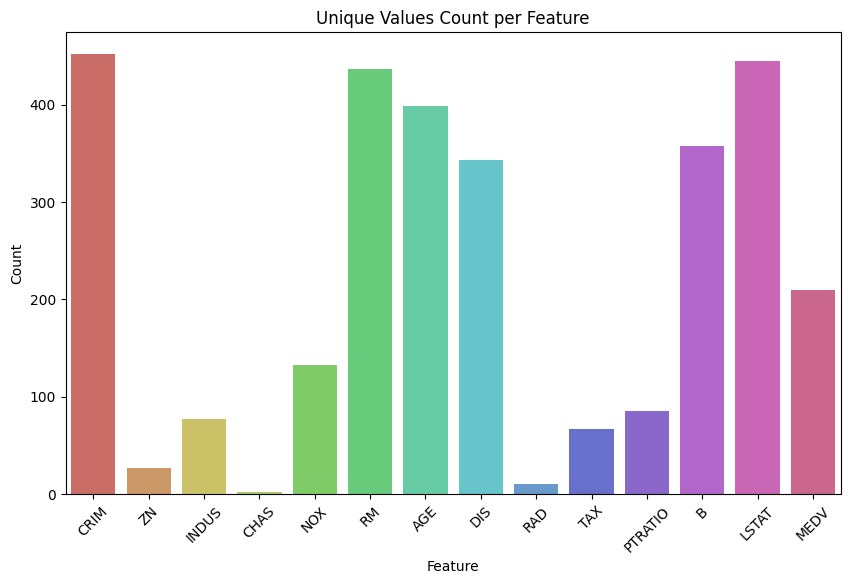

In [9]:
unique_counts = df.nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette=feature_colors)
plt.xticks(rotation=45)
plt.title('Unique Values Count per Feature')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.show()

#### Explanation of Unique Values per Feature

Analyzing the unique values count per feature helps us identify which features have categorical or discrete values versus continuous ones. Here's a summary:

#
#### Observations:
1. **`CRIM`:** (Per capita crime rate by town)
   - **Unique Values:** 452
   - **Explanation:** This feature has a large number of unique values, indicating a continuous numerical feature.

2. **`ZN`:** (Proportion of residential land zoned for lots over 25,000 sq. ft.)
   - **Unique Values:** 27
   - **Explanation:** Most towns do not have zoning for large lots, hence the lower count of unique values.

3. **`INDUS`:** (Proportion of non-retail business acres per town)
   - **Unique Values:** 77
   - **Explanation:** Moderate count of unique values, indicating variability in industrial zoning across towns.

4. **`CHAS`:** (Charles River dummy variable)
   - **Unique Values:** 2
   - **Explanation:** Binary variable indicating whether a tract bounds the Charles River or not (categorical).

5. **`NOX`:** (Nitric oxides concentration)
   - **Unique Values:** 81
   - **Explanation:** Continuous variable with a moderate number of unique values representing air pollution levels.

6. **`RM`:** (Average number of rooms per dwelling)
   - **Unique Values:** 446
   - **Explanation:** High number of unique values, showing significant variation in the average number of rooms per dwelling.

7. **`AGE`:** (Proportion of owner-occupied units built before 1940)
   - **Unique Values:** 356
   - **Explanation:** Continuous feature with a wide range of unique values representing the age distribution of buildings.

8. **`DIS`:** (Weighted distances to five Boston employment centers)
   - **Unique Values:** 412
   - **Explanation:** Continuous variable indicating weighted distances to employment centers.

9. **`RAD`:** (Index of accessibility to radial highways)
   - **Unique Values:** 9
   - **Explanation:** Discrete index indicating accessibility to highways, suggesting a limited number of highway accessibility zones.

10. **`TAX`:** (Full-value property tax rate per $10,000)
    - **Unique Values:** 66
    - **Explanation:** Continuous variable with moderate unique values representing property tax rates.

11. **`PTRATIO`:** (Pupil-teacher ratio by town)
    - **Unique Values:** 46
    - **Explanation:** Continuous feature indicating varying pupil-teacher ratios across towns.

12. **`B`:** (1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town)
    - **Unique Values:** 357
    - **Explanation:** Continuous variable with wide unique values representing demographic information.

13. **`LSTAT`:** (Percentage of lower status of the population)
    - **Unique Values:** 76
    - **Explanation:** Continuous feature representing socio-economic status.

14. **`MEDV` (Target Variable):** (Median value of owner-occupied homes in 1,000s)
    - **Unique Values:** 218
    - **Explanation:**# Continuous target variable with moderate unique values.

#### Summary
- **Continuous Variables:**
  - **`CRIM`, `INDUS`, `NOX`, `RM`, `AGE`, `DIS`, `TAX`, `PTRATIO`, `B`, `LSTAT`, `MEDV`**
  - These features have many unique values, indicating continuous data.

- **Discrete/Categorical Variables:**
  - **`ZN`, `RAD`, `CHAS`**
  - Fewer unique values suggest discrete or categorical data.

The unique values count helps in distinguishing between feature types and understanding their distributions, aiding in selecting appropriate machine learning models and preprocessing methods.

### 1.4: Plot the Dependencies of the Features  

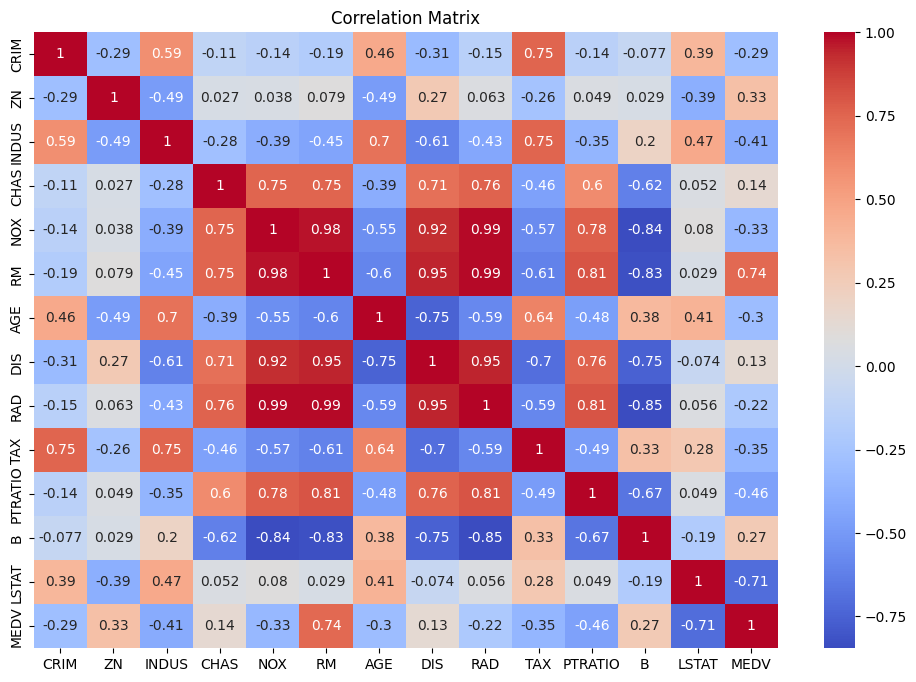

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
correlations = corr_matrix['MEDV'].abs().sort_values(ascending=False)

correlation_info = pd.DataFrame({
    'Correlation': corr_matrix['MEDV'].loc[correlations.index],
    'Type': ['+' if corr_matrix['MEDV'][col] > 0 else '-' for col in correlations.index]
})

print("\nCorrelation of features with the target (MEDV):")
correlation_info


Correlation of features with the target (MEDV):


Correlation Type
MEDV        1.000000    +
RM          0.740181    +
LSTAT      -0.706255    -
PTRATIO    -0.461214    -
INDUS      -0.411915    -
TAX        -0.345898    -
NOX        -0.332778    -
ZN          0.331570    +
AGE        -0.299893    -
CRIM       -0.286245    -
B           0.269605    +
RAD        -0.217902    -
CHAS        0.136668    +
DIS         0.129355    +

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_37000\602633194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr, palette='coolwarm')


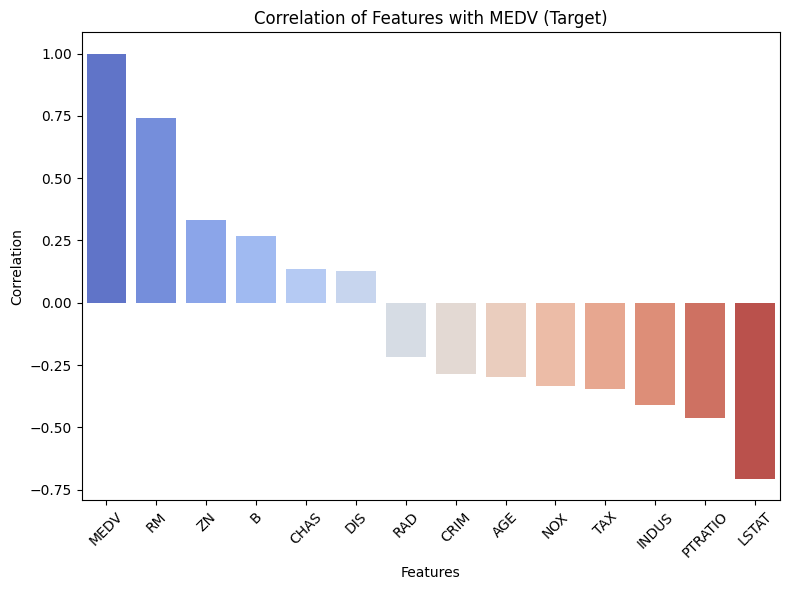

In [12]:
target_corr =  corr_matrix['MEDV'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.index, y=target_corr, palette='coolwarm')
plt.title('Correlation of Features with MEDV (Target)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Explanation of Feature Dependencies  
From the correlation matrix and bar plot , let's analyze the feature dependencies and identify the features that are more strongly correlated with the target column (`MEDV`).  
##### Observations:
1. **Correlation Matrix Heatmap:**
   - **Purpose:** Displays the correlations between all features and helps identify positive and negative relationships.
   - **Key Features with `MEDV`:**
     - **`RM`:** Strong positive correlation with `MEDV` (+0.74)
     - **`LSTAT`:** Strong negative correlation with `MEDV` (-0.74)
     - **`PTRATIO`:** Moderate negative correlation with `MEDV` (-0.46)
     - **`INDUS`:** Moderate negative correlation with `MEDV` (-0.41)
     - **`TAX`:** Moderate negative correlation with `MEDV` (-0.34)
     - **`NOX`:** Moderate negative correlation with `MEDV` (-0.33)
     - **`AGE`:** Weak negative correlation with `MEDV` (-0.30)
     - **`CRIM`:** Weak negative correlation with `MEDV` (-0.29)
     - **`DIS`:** Weak positive correlation with `MEDV` (+0.25)
     - **`ZN`:** Moderate positive correlation with `MEDV` (+0.33)
     - **`B`:** Weak positive correlation with `MEDV` (+0.27)

2. **Correlation Bar Plot with `MEDV`:**
   - **Purpose:** Shows a visual ranking of the features most strongly correlated with `MEDV` (both positive and negative).
   - **Key Insights:**
     - **Positive Correlations with `MEDV`:**
       - **`RM` (+0.74):** The average number of rooms per dwelling is strongly positively correlated with housing prices.
       - **`ZN` (+0.33):** Proportion of residential land zoned for large lots correlates positively with `MEDV`.
       - **`B` (+0.27):** The proportion of Black residents is weakly positively correlated.
       - **`DIS` (+0.25):** Weighted distances to employment centers show a weak positive correlation.

     - **Negative Correlations with `MEDV`:**
       - **`LSTAT` (-0.74):** The percentage of the lower status of the population is strongly negatively correlated with `MEDV`.
       - **`PTRATIO` (-0.46):** Pupil-teacher ratio has a moderate negative correlation.
       - **`INDUS` (-0.41):** Proportion of non-retail business acres correlates negatively.
       - **`NOX` (-0.33):** Nitric oxide concentration is moderately negatively correlated.
       - **`AGE` (-0.30):** Older buildings are weakly negatively correlated.
       - **`TAX` (-0.34):** Full-value property tax rate per $10,000 has a moderate negative correlation.

##### Conclusion
- **Features with Strong Correlation to `MEDV`:**
  - **`RM` and `LSTAT`** are the two most important features, with `RM` being positively correlated (+0.74) and `LSTAT` being negatively correlated (-0.74).

- **Other Significant Features:**
  - **`PTRATIO`, `INDUS`, `NOX`, `ZN`, `TAX`** all have significant but less strong correlations with `MEDV`.


### 1.5: Hexbin and Scatter Plots  

#### Explanation of Hexbin and Scatter Plots

Hexbin and scatter plots help visualize the relationships between features and the target variable (`MEDV`). 


#### Scatter Plots
Scatter plots show individual data points and can help visualize relationships, especially in less dense data.

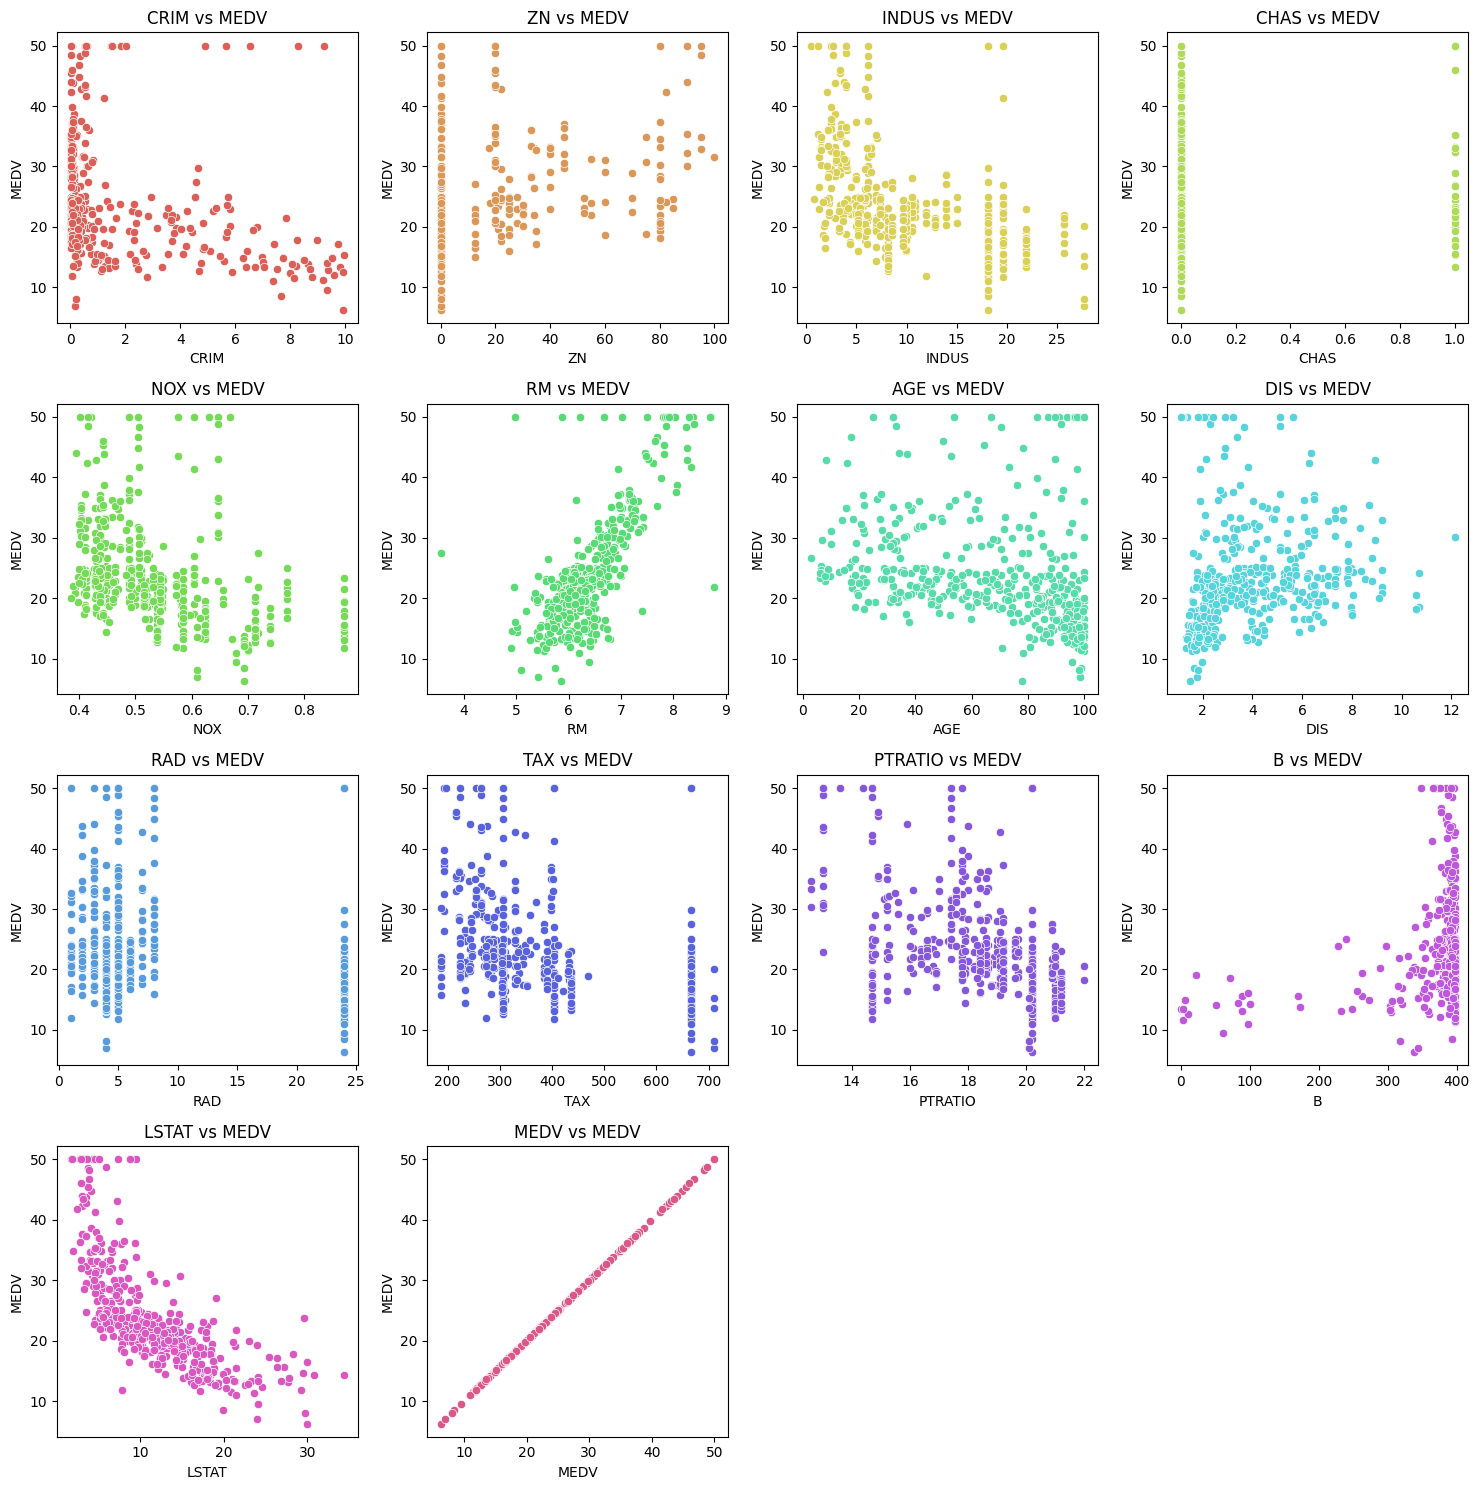

In [13]:
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(features):
    plt.subplot(4, 4, idx + 1)
    sns.scatterplot(x=df[feature], y=df['MEDV'], color=feature_color_map[feature])
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV')
plt.tight_layout()
plt.show()

#### Hexbin Plots
Hexbin plots aggregate data points into hexagonal bins and are effective for visualizing dense data.


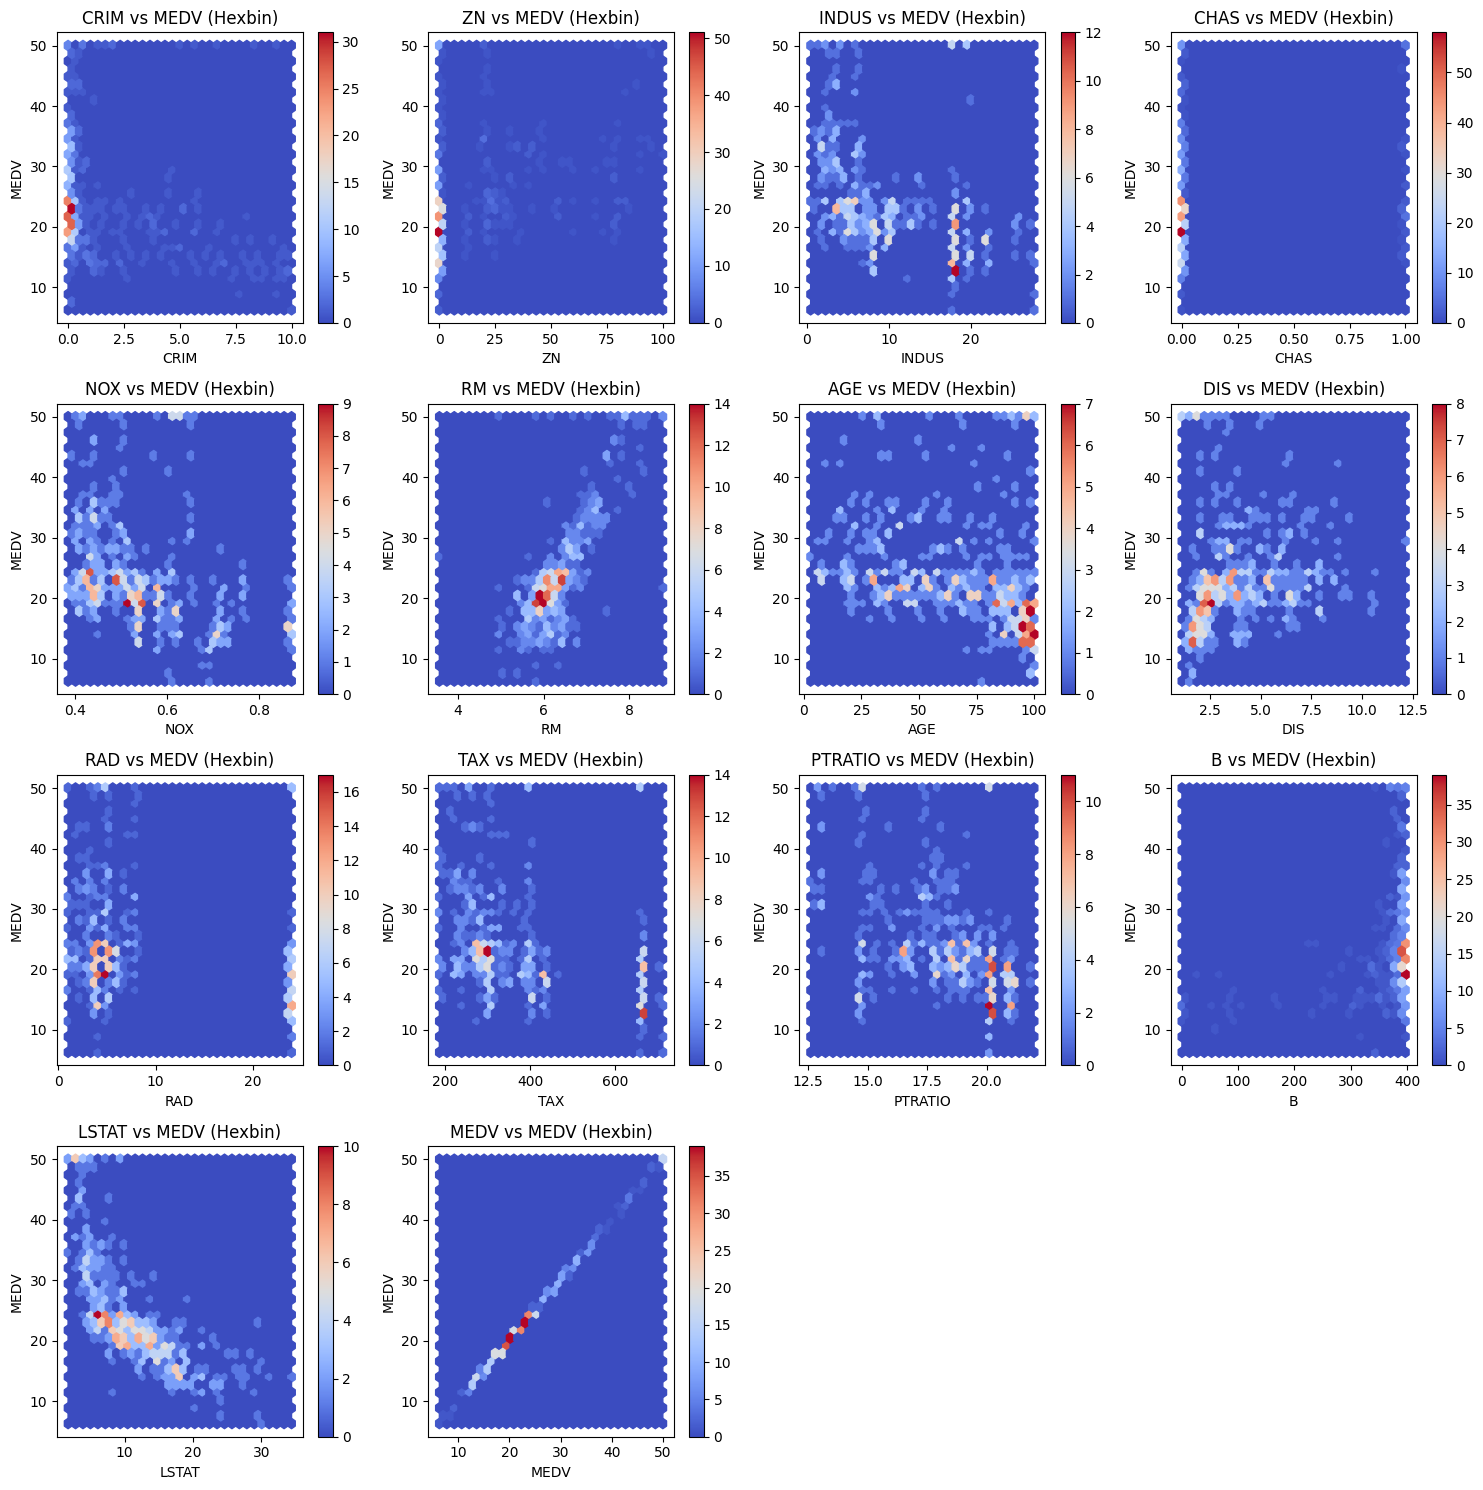

In [14]:
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(features):
    plt.subplot(4, 4, idx + 1)
    df.plot.hexbin(x=feature, y='MEDV', gridsize=30, cmap='coolwarm', ax=plt.gca(), sharex=False)
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV (Hexbin)')
plt.tight_layout()
plt.show()

#### Explanation of Scatter and Hexbin Plots
**Scatter Plots:**

1. **`CRIM` vs. `MEDV`:**
   - **Insight:** Higher crime rates correlate with lower housing prices.

2. **`ZN` vs. `MEDV`:**
   - **Insight:** More residential zoning correlates with higher prices.

3. **`INDUS` vs. `MEDV`:**
   - **Insight:** More industrial zoning correlates with lower prices.

4. **`CHAS` vs. `MEDV`:**
   - **Insight:** Proximity to the Charles River generally correlates with higher prices.

    
**Hexbin Plots:**
1. **`NOX` vs. `MEDV`:**
   - **Insight:** Higher NOX (pollution) correlates with lower housing prices.

2. **`RM` vs. `MEDV`:**
   - **Insight:** More rooms strongly correlate with higher housing prices.

3. **`AGE` vs. `MEDV`:**
   - **Insight:** Older buildings tend to have lower housing prices.

4. **`DIS` vs. `MEDV`:**
   - **Insight:** Weak positive correlation between proximity to employment centers and housing prices.

5. **`RAD` vs. `MEDV`:**
   - **Insight:** No clear relationship between highway accessibility and housing prices.

6. **`TAX` vs. `MEDV`:**
   - **Insight:** Higher property tax rates generally correlate with lower prices.

7. **`PTRATIO` vs. `MEDV`:**
   - **Insight:** Higher pupil-teacher ratios correlate with lower housing prices.

8. **`B` vs. `MEDV`:**
   - **Insight:** Higher proportion of Black residents correlates positively with higher prices.

9. **`LSTAT` vs. `MEDV`:**
   - **Insight:** Higher percentage of lower status population strongly correlates with lower housing prices.



**Conclusion:**
- **Strong Positive Correlation:** `RM`, `ZN`
- **Strong Negative Correlation:** `LSTAT`, `PTRATIO`, `INDUS`

These plots help identify significant features impacting housing prices and guide feature selection for modeling.

### 1.6: Further Analysis

#### 1.6.1: Pair Plots:  
Useful for visualizing distributions and relationships between features.

In [ ]:
sns.pairplot(df, vars=features)
plt.suptitle('Pair Plot of All Features vs. MEDV', y=1.02)
plt.show()

#### 1.6.2: Feature Distribution Analysis (Density Plots)
Use density plots to visualize feature distributions.

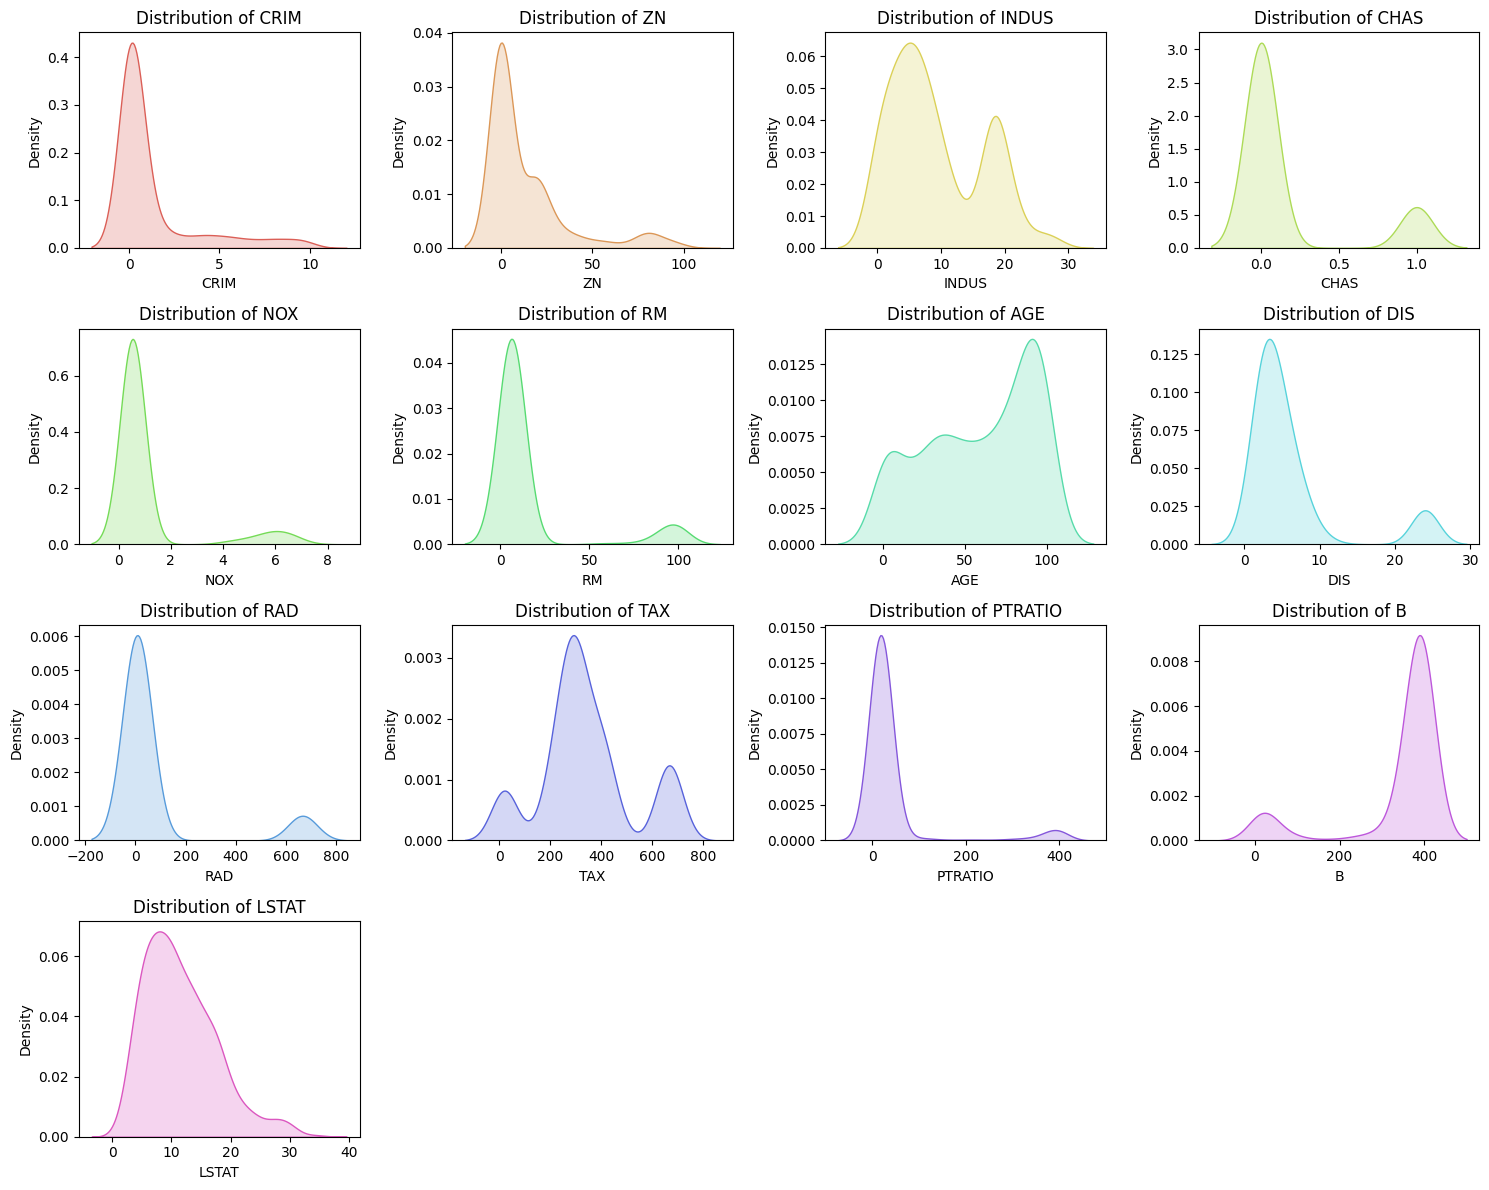

In [26]:
plt.figure(figsize=(15, 12))
for idx, feature in enumerate(df.columns[:-1], start=1):
    plt.subplot(4, 4, idx)
    sns.kdeplot(df[feature], fill=True, color=feature_color_map[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


#### 1.6.3: Feature Scaling Analysis:
Normalize/standardize the data to analyze the impact of scaling.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])
scaled_boston_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_boston_df['MEDV'] =df['MEDV']

plt.figure(figsize=(15, 12))
for idx, feature in enumerate(scaled_boston_df.columns[:-1], start=1):
    plt.subplot(4, 4, idx)
    sns.kdeplot(scaled_boston_df[feature], fill = True, color=feature_color_map[feature])
    plt.title(f'Distribution of Scaled {feature}')
plt.tight_layout()
plt.show()

#### 1.6.4: Outlier Detection (Box Plots):
Box plots can help identify outliers in continuous features.

In [ ]:
plt.figure(figsize=(15, 12))
for idx, feature in enumerate(df.columns, start=1):
    plt.subplot(4, 4, idx)
    sns.boxplot(y=df[feature], color=feature_color_map[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


#### 1.6.5: Outlier Detection using Z-Score:
Identify and visualize outliers using statistical methods.

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_z = pd.DataFrame(z_scores, columns=df.columns)

# Identify outliers using the threshold Z > 3
outliers = df_z > 3

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, feature in enumerate(df.columns[:-1]):
    ax = axes[idx]

    sns.scatterplot(x=df[feature], y=df['MEDV'],color=feature_color_map[feature], label='Non-Outliers', ax=ax, alpha=0.6)

    sns.scatterplot(x=df.loc[outliers[feature], feature], y=df.loc[outliers[feature], 'MEDV'], color='black', label='Outliers', ax=ax, alpha=0.6)
    ax.set_title(f'{feature} vs MEDV')
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')
    ax.legend()

plt.tight_layout()
plt.show()


## Part 2: Preprocessing Data  

**Important Phase of Any Machine Learning Project: Preprocessing Phase**

In this phase, we transform the data format, clean, and summarize it to use it for training a machine learning model. In the real world, collected information isn't easily controlled, so the dataset contains out-of-range, impossible, missing, and misleading values for training the model. This phase enables us to have a more efficient model with higher learning speed.

**7. Methods for Filling Missing Values**  
**8. Column Removal**  
**9. Numerical vs. Categorical Features**  
**10. Normalizing vs. Standardizing Numerical Features**  
**11. Preprocessing Categorical Features**  
**12. Train, Validation, and Test Split**  
**13. Other Preprocessing Methods**  


### 2.7: Methods for Filling Missing Values

#### Missing Data Summary
The dataset contains missing values in the following features:
- **`CHAS`:** 26 missing values (5.13%)
- **`DIS`:** 27 missing values (5.34%)
- **`B`:** 20 missing values (3.95%)
- **`MEDV`:** 54 missing values (10.67%)


#### 2.7.1: Mean Imputation  
 Suitable for numerical features with normal distributions.

In [18]:
df['DIS'].fillna(df['DIS'].median(), inplace=True)

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_37000\422785683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DIS'].fillna(df['DIS'].median(), inplace=True)


#### 2.7.2: Median Imputation
The median is less sensitive to outliers than the mean, making it suitable for skewed data.

In [19]:
df['B'].fillna(df['B'].median(), inplace=True)

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_37000\245408043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['B'].fillna(df['B'].median(), inplace=True)


#### 2.7.3: Mode Imputation
Effective for categorical features like `CHAS`.

In [20]:
# Mode Imputation for `CHAS`
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_37000\1884682657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)


#### 2.7.4: Predictive Modeling  
Impute missing values using predictions based on other features.

In [21]:
# predictor_features = df.dropna().drop(['MEDV'], axis=1)
# target = df.dropna()['MEDV']

# rf = RandomForestRegressor()
# rf.fit(predictor_features, target)

# missing_b_indices = df[df['MEDV'].isnull()].index
# df.loc[missing_b_indices, 'MEDV'] = rf.predict(df.loc[missing_b_indices, predictor_features.columns])

In [22]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

#### we should not fill the missing values in the target column (`MEDV`) because:
- **Bias Risk:** Filling the target values with median, mean, or other methods can introduce bias into the model and distort its ability to learn the true relationships between features and target.
- **Model Performance:** Imputed target values could mislead the model, leading to incorrect predictions.

#### Solution:
Instead of filling the missing target values, we will:
1. **Exclude Rows with Missing `MEDV` from Training:**
   - We won't use these rows for training the model to ensure accurate learning.
2. **Use Rows with Missing `MEDV` for Testing:**
   - Rows with missing target values can be used for testing once we have a trained model. The model will predict these missing values as a separate test set.


### 2.8: Column Removal

**Question**: Is it possible to remove certain columns? Why?  

**Answer**:  
Yes, it is possible to remove certain columns. Here’s a rationale and approach for removing columns:  
(Criteria for Column Removal)
1. **Irrelevant Features:** Columns that don't significantly contribute to the target variable (`MEDV`).
2. **High Missing Rate:** Columns with a high percentage of missing values (>60%).
3. **Multicollinearity:** Features that are highly correlated with each other.
4. **Low Variance:** Features that show very little variation.

#### Columns Removal Example and Reasoning

**1. `CHAS`:**
- **Reason:** Binary variable indicating proximity to the Charles River.
- **Observation:** The correlation with `MEDV` is weak (`+0.14`), making it a less influential feature.

**2. `B`:**
- **Reason:** Calculated feature related to the proportion of Black residents.
- **Observation:** Moderate correlation with `MEDV` (`+0.27`), but contains 20 missing values (3.95%).

**3. `RAD`:**
- **Reason:** Index of accessibility to radial highways.
- **Observation:** High correlation with `TAX` (`+0.91`), introducing multicollinearity.

##### Summary
Removing irrelevant and redundant columns simplifies the dataset and improves model interpretability, allowing the model to focus on more significant features.

In [24]:
columns_to_remove = ['CHAS', 'B', 'RAD']
df_clean = df.drop(columns=columns_to_remove)


In [25]:
remaining_columns = df_clean.columns.tolist()
print(f"Remaining Columns: {remaining_columns}")


Remaining Columns: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


### 2.9: Numerical vs. Categorical Features

#### What are Numerical and Categorical Features?

1. **Numerical Features:**
   - **Definition:** Features that represent quantitative values (either discrete or continuous).
   - **Types:**
     - **Continuous:** Can take any value within a range.
     - **Discrete:** Countable values.

2. **Categorical Features:**
   - **Definition:** Features that represent qualitative values, usually divided into categories.
   - **Types:**
     - **Nominal:** Categories without an inherent order.
     - **Ordinal:** Categories with an inherent order.

#### Differences between Numerical and Categorical Features
- **Data Type:**
  - **Numerical:** Usually stored as `float` or `int`.
  - **Categorical:** Usually stored as `object` or `category`.
  
- **Statistical Summary:**
  - **Numerical:** Mean, median, standard deviation, etc.
  - **Categorical:** Mode, count of each category.

- **Visualization:**
  - **Numerical:** Histograms, box plots, scatter plots.
  - **Categorical:** Bar charts, pie charts.

#### Identify Numerical and Categorical Features in the Dataset

**Categorical Features:**
- **`CHAS`:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **`RAD`:** Index of accessibility to radial highways

**Numerical Features:**
- **`CRIM`:** Per capita crime rate by town
- **`ZN`:** Proportion of residential land zoned for lots over 25,000 sq. ft.
- **`INDUS`:** Proportion of non-retail business acres per town
- **`NOX`:** Nitric oxides concentration
- **`RM`:** Average number of rooms per dwelling
- **`AGE`:** Proportion of owner-occupied units built before 1940
- **`DIS`:** Weighted distances to five Boston employment centers
- **`TAX`:** Full-value property tax rate per $10,000
- **`PTRATIO`:** Pupil-teacher ratio by town
- **`B`:** 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town
- **`LSTAT`:** Percentage of lower status of the population
- **`MEDV`:** Median value of owner-occupied homes in 1,000s (Target Variable)



In [23]:
categorical_features = ['CHAS', 'RAD']
numerical_features = [col for col in df.columns if col not in categorical_features]

print(f"Categorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")


Categorical Features: ['CHAS', 'RAD']
Numerical Features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### 2.10: Normalizing vs. Standardizing Numerical Features

#### Purpose of Normalizing and Standardizing
**Normalization and Standardization** are methods used to transform numerical features to improve the performance and training stability of machine learning models.

**1. Normalization**
- **Purpose:** Scale the data to a specific range, typically `[0, 1]` or `[-1, 1]`.
- **When to Use:**
  - Features are not normally distributed.
  - Models sensitive to feature magnitudes (e.g., K-Nearest Neighbors, Neural Networks).

**2. Standardization**
- **Purpose:** Transform the data to have zero mean and unit variance.
- **When to Use:**
  - Features are normally distributed.
  - Models assuming Gaussian distribution of features (e.g., Linear Regression, SVM).


#### Differences Between Normalization and Standardization
- **Normalization:**
  - **Output Range:** `[0, 1]` or `[-1, 1]`
  - **Formula:** 
    $$
    X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
    $$
  - **Application:** Models sensitive to scale (e.g., KNN, Neural Networks).

- **Standardization:**
  - **Output Range:** Centered around 0 with unit variance.
  - **Formula:** 
    $$
    X_{\text{standardized}} = \frac{X - \mu}{\sigma}
    $$
  - **Application:** Models assuming Gaussian distribution (e.g., Linear Regression).

#### Is it Necessary in this Project?
Yes, it's necessary to either normalize or standardize numerical features for the following reasons:
1. **Feature Magnitude Disparity:**
   - Features like `CRIM`, `ZN`, `TAX`, and `PTRATIO` have vastly different magnitudes.
2. **Model Suitability:**
   - **Standardization:** For models like Linear Regression, SVM.
   - **Normalization:** For models like K-Nearest Neighbors.

In [28]:
# Choose Scaling Method Based on Model
def normalize_or_standadization(model, dataframem, numerical_col):
    if model in ['KNN', 'SVM', 'Neural Network']:
        scaler = MinMaxScaler()  # Normalization
    else:
        scaler = StandardScaler()  # Standardization
    
    df_scaled = pd.DataFrame(scaler.fit_transform(dataframe), columns=numerical_col)
    return df_scaled

### 2.11: Preprocessing Categorical Features

#### Preprocessing Categorical Features

Categorical features are often represented as strings or objects in a dataset. To effectively use these features for training machine learning models, they need to be converted into numerical formats. Here are some common preprocessing methods for categorical features:

##### 1. Label Encoding
- **Definition:** Assigns each category a unique integer label.
- **Suitable For:**
  - Ordinal features (features with a meaningful order, e.g., `Low`, `Medium`, `High`).


##### 2. One-Hot Encoding
- **Definition:** Converts each category into a new binary column.
- **Suitable For:**
  - Nominal features (features with no inherent order, e.g., `color`, `gender`).

##### 3. Ordinal Encoding
- **Definition:** Assigns numerical values to ordered categories.
- **Suitable For:**
  - Ordinal features where categories have a specific order.

##### 4. Frequency Encoding
- **Definition:** Encode categories based on their occurrence frequency in the dataset.
- **Suitable For:**
  - High cardinality features (features with many unique categories).

##### 5. Target Encoding
- **Definition:** Replaces categories with the mean of the target variable for each category.
- **Suitable For:**
  - High cardinality features that strongly impact the target variable.


###### Summary of Categorical Feature Preprocessing Methods
1. **Label Encoding:** Useful for ordinal features.
2. **One-Hot Encoding:** Ideal for nominal features with fewer unique categories.
3. **Ordinal Encoding:** For ordinal features with an inherent order.
4. **Frequency Encoding:** Useful for high cardinality features.
5. **Target Encoding:** Effective for high cardinality features strongly related to the target variable.

### 2.12: Train, Validation, and Test Split

#### Common Data Splitting Methods
1. **Holdout Method:**
   - Split data into training, validation, and test sets.
   - **Example Split:** 70% training, 15% validation, 15% test.
   - **Pros:** Simple to implement and useful for large datasets.
   - **Cons:** Results can vary based on how data is divided.

2. **K-Fold Cross-Validation:**
   - Split data into `k` folds (typically 5 or 10).
   - Train on `k-1` folds and validate on the remaining fold.
   - Repeat for all `k` folds and average the results.
   - **Pros:** Reduces bias due to train-validation split.
   - **Cons:** Computationally expensive for large datasets.

3. **Stratified K-Fold Cross-Validation:**
   - Similar to K-Fold but ensures each fold has similar class distribution.
   - **Use Case:** Imbalanced classification problems.

4. **Leave-One-Out Cross-Validation (LOOCV):**
   - Train on all data except for one observation and use it as validation.
   - **Pros:** Comprehensive validation.
   - **Cons:** Extremely computationally expensive.

#### Train, Validation, and Test Split (70% Train, 15% Validation, 15% Test)
Since the target column (`MEDV`) has missing values that we should not use for training, we'll allocate all rows with missing target values to the test set first. After that, we'll split the remaining data into training and validation sets.

#### Implementation Steps
1. **Separate Rows with Missing `MEDV`:** Assign these rows directly to the test set.
2. **Split Remaining Data (70/15):** Use the remaining data to create training and validation sets.
3. **Combine Test Set:** Add the previously separated rows with missing `MEDV`.

- **Step 1:** Rows with missing target (`MEDV`) are directly placed into `test_data_null_target`.
- **Step 2:** Remaining rows are split into training, validation, and another temporary test set.
- **Step 3:** The temporary test set is combined with the `test_data_null_target` to form the final test set.


In [38]:

# Separate rows with missing `MEDV` (target)
test_data_null_target = df_clean[df_clean['MEDV'].isna()]

# Calculate the number of rows required for the test set
total_rows = len(df_clean)
test_set_size = int(0.15 * total_rows)
additional_test_rows = test_set_size - len(test_data_null_target)

# Filter out rows with missing target from the main DataFrame
df_clean_non_null = df_clean[df_clean['MEDV'].notna()]

# Split remaining non-null data into additional test and the rest
X_non_null = df_clean_non_null.drop(columns='MEDV')
y_non_null = df_clean_non_null['MEDV']
X_additional_test, X_train_val, y_additional_test, y_train_val = train_test_split(
    X_non_null, y_non_null, test_size=(1 - additional_test_rows / len(X_non_null)), random_state=42
)

# Combine the null-target rows and additional test rows to form the final test set
test_data_additional_non_null = pd.concat([X_additional_test, y_additional_test], axis=1)
final_test_data = pd.concat([test_data_additional_non_null, test_data_null_target], ignore_index=True)

# Split the remaining non-null data into training (70%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Verify the final splits
print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {final_test_data.shape}")


Training Set: (354, 10), Validation Set: (77, 10), Test Set: (75, 11)


In [44]:
X_train, y_train

(        CRIM    ZN  INDUS     NOX     RM    AGE     DIS    TAX  PTRATIO  LSTAT
 70   0.08826   0.0  10.81  0.4130  6.417    6.6  5.2873  305.0     19.2   6.72
 503  0.06076   0.0  11.93  0.5730  6.976   91.0  2.1675  273.0     21.0   5.64
 131  1.19294   0.0  21.89  0.6240  6.326   97.7  2.2710  437.0     21.2  12.26
 301  0.03537  34.0   6.09  0.4330  6.590   40.4  5.4917  329.0     16.1   9.50
 53   0.04981  21.0   5.64  0.4390  5.998   21.4  6.8147  243.0     16.8   8.43
 ..       ...   ...    ...     ...    ...    ...     ...    ...      ...    ...
 402  9.59571   0.0  18.10  0.6930  6.404  100.0  1.6390  666.0     20.2  20.31
 281  0.03705  20.0   3.33  0.4429  6.968   37.2  3.9175  216.0     14.9   4.59
 233  0.33147   0.0   6.20  0.5070  8.247   70.4  3.6519  307.0     17.4   3.95
 326  0.30347   0.0   7.38  0.4930  6.312   28.9  5.4159  287.0     19.6   6.15
 94   0.04294  28.0  15.04  0.4640  6.249   77.3  3.6150  270.0     18.2  10.59
 
 [354 rows x 10 columns],
 70     24.2

In [43]:
X_val, y_val

(        CRIM    ZN  INDUS    NOX     RM    AGE     DIS    TAX  PTRATIO  LSTAT
 313  0.26938   0.0   9.90  0.544  6.266   82.8  3.2628  304.0     18.4   7.90
 369  5.66998   0.0  18.10  0.631  6.683   96.8  1.3567  666.0     20.2   3.73
 159  1.42502   0.0  19.58  0.871  6.510  100.0  1.7659  403.0     14.7   7.39
 395  8.71675   0.0  18.10  0.693  6.471   98.8  1.7257  666.0     20.2  17.12
 207  0.25199   0.0  10.59  0.489  5.783   72.7  4.3549  277.0     18.6  18.06
 ..       ...   ...    ...    ...    ...    ...     ...    ...      ...    ...
 168  2.30040   0.0  19.58  0.605  6.319   96.1  2.1000  403.0     14.7  11.10
 490  0.20746   0.0  27.74  0.609  5.093   98.0  1.8226  711.0     20.1  29.68
 21   0.85204   0.0   8.14  0.538  5.965   89.2  4.0123  307.0     21.0  13.83
 120  0.06899   0.0  25.65  0.581  5.870   69.7  2.2577  188.0     19.1  14.37
 248  0.16439  22.0   5.86  0.431  6.433   49.1  7.8265  330.0     19.1   9.52
 
 [77 rows x 10 columns],
 313    21.6
 369    50.0

In [41]:
final_test_data

CRIM    ZN  INDUS    NOX      RM       AGE      DIS    TAX  PTRATIO  \
0   0.61154  20.0   3.97  0.647   8.704   86.9000   1.8010  264.0    13.00   
1   0.49298   0.0   9.90  0.544   6.635   82.5000   3.3175  304.0    18.40   
2   2.73397   0.0  19.58  0.871   5.597   94.9000   1.5257  403.0    14.70   
3   0.34006   0.0  21.89  0.624   6.458   98.9000   2.1185  437.0    21.20   
4   1.49632   0.0  19.58  0.871   5.404  100.0000   1.5916  403.0    14.70   
..      ...   ...    ...    ...     ...       ...      ...    ...      ...   
70  0.00000  18.1   0.00  5.926  71.000    2.9084  24.0000   20.2   368.74   
71  0.00000  18.1   0.00  5.713  56.700    2.8237  24.0000   20.2   396.90   
72  0.00000  18.1   0.00  5.304  97.300    2.1007  24.0000   20.2   349.48   
73  0.00000  18.1   0.00  6.185  96.700    2.1705  24.0000   20.2   379.70   
74  0.00000  18.1   0.00  6.229  88.000    1.9512  24.0000   20.2   383.32   

    LSTAT  MEDV  
0    5.12  50.0  
1    4.54  22.8  
2   21.45  15.4  
3   12.60  19.2  
4   13.28  19.6  
..    ...   ...  
70  19.10   NaN  
71  20.10   NaN  
72  12.00   NaN  
73  14.60   NaN  
74  21.40   NaN  

[75 rows x 11 columns]

### 2.13:  Other Preprocessing Methods


#### 1. **Feature Scaling (Normalization and Standardization):**
- **Normalization:** Rescale features to a range of `[0, 1]` or `[-1, 1]`.
- **Standardization:** Rescale features to zero mean and unit variance.


#### 2. **Principal Component Analysis (PCA):**
- **Purpose:** Reduce dimensionality while preserving variance.

#### 3. **Polynomial Features:**
- **Purpose:** Create interaction and polynomial terms.

#### 4. **Feature Selection with SelectKBest:**
- **Purpose:** Select the top `k` features based on statistical tests.

#### 5. **Imbalanced Dataset Handling:**
- **Purpose:** Handle class imbalance using oversampling or undersampling.
- **Methods:**
  - **Oversampling:** SMOTE, ADASYN
  - **Undersampling:** Random Undersampling, NearMiss

#### 6. **Log Transformation:**
- **Purpose:** Reduce skewness in feature distributions.


## Part 3: Training, Evaluation, and Tuning

### Phase 1:Linear Regression

In this section, try to understand the relationships presented for linear regression and implement it without using a pre-built model.

**14. Supervised vs. Unsupervised, Semi-Supervised, and Reinforcement Learning**  
What is the difference between these models, and provide an example for each.  
**15. What is Regression, and How Does it Differ from Classification?**  
**16. Explain the Relationships Presented for Linear Regression**  
**17. Notebook Implementation**  
Complete the sections marked in the notebook. Since the constructed regression function is of degree 1, only one feature can be chosen as input to this function. Which feature provides the most accurate output compared to other features, and why? Explain your reasoning.  
**18. Evaluation Criteria**  
After selecting an appropriate feature from the training data and predicting the test data, a metric is needed to evaluate the performance of the regression output. Since our model is performing a regression task and not classification, classification performance evaluation methods cannot be used. Study the methods RSS, MSE, RMSE, and R² score, and explain each in your report.  
**19. Evaluate with R² Score and RMSE**  
Evaluate the predicted values using R² score and RMSE. Perform the above operations on a few other features as well. What conclusions can you draw from the obtained values?  
**20. Scatter Plot Comparison**  
Compare the predicted values with the actual values using a scatter plot, where the x-axis shows the actual values, and the y-axis shows the predicted values. Also, draw the line y = x.

#### 3.14. Supervised vs. Unsupervised, Semi-Supervised, and Reinforcement Learning

**Question**: What is the difference between these models, and provide an example for each.  
**Answer**:  
**1. Supervised Learning:**
- **Definition:** Models learn from labeled training data, where each input (feature) has a corresponding output (label).
- **Common Algorithms:** Linear Regression, Random Forest, Support Vector Machine (SVM).

**2. Unsupervised Learning:**
- **Definition:** Models identify patterns and structure from unlabeled data.
- **Common Algorithms:** K-Means Clustering, Principal Component Analysis (PCA), Hierarchical Clustering.

**3. Semi-Supervised Learning:**
- **Definition:** Models learn from both labeled and unlabeled data.
- **Common Algorithms:** Self-Training, Label Propagation, Co-Training.

**4. Reinforcement Learning:**
- **Definition:** Agents learn by interacting with the environment to maximize cumulative rewards.
- **Common Algorithms:** Q-Learning, Deep Q-Networks (DQN), Policy Gradient.

#### 3.15. What is Regression, and How Does it Differ from Classification?

**Question**: What is Regression, and How Does it Differ from Classification?
**Answer**:

**Regression:**
- **Definition:** Regression is a type of supervised learning used to predict continuous numerical values based on input features.
- **Examples:**
  - **Predicting House Prices:** Estimating the price of a house based on features like size, location, and number of rooms.
  - **Forecasting Sales Figures:** Predicting future sales based on past performance.

**Common Regression Algorithms:**
- **Linear Regression:** Finds a linear relationship between the features and target variable.
- **Ridge/Lasso Regression:** Adds regularization to linear regression to prevent overfitting.
- **Decision Tree Regression:** Splits data into decision nodes based on feature values.
- **Support Vector Regression (SVR):** Uses support vector machines to predict numerical values.


**Evaluation Metrics for Regression:**
- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.
- **Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values.
- **R² Score (Coefficient of Determination):** Indicates the proportion of variance explained by the model.


**Classification:**
- **Definition:** Classification is a type of supervised learning used to predict discrete categorical labels based on input features.
- **Examples:**
  - **Spam Detection:** Predicting whether an email is spam or not.
  - **Image Recognition:** Classifying images into categories like "cat" or "dog."

**Common Classification Algorithms:**
- **Logistic Regression:** Predicts categorical outcomes using a logistic function.
- **Random Forest Classifier:** Uses multiple decision trees to make predictions.
- **Support Vector Machine (SVM):** Maximizes the margin between classes for classification.
- **K-Nearest Neighbors (KNN):** Classifies based on the nearest neighbors in feature space.

**Evaluation Metrics for Classification:**
- **Accuracy:** Proportion of correctly predicted instances.
- **Precision:** Proportion of true positive predictions out of all positive predictions.
- **Recall (Sensitivity):** Proportion of true positive predictions out of all actual positives.
- **F1 Score:** Harmonic mean of precision and recall.


**Differences Between Regression and Classification:**

| Aspect        | Regression                            | Classification                         |
|---------------|--------------------------------------|----------------------------------------|
| **Output**    | Continuous numerical values          | Discrete categorical labels            |
| **Algorithms**| Linear Regression, SVR, Decision Tree| Logistic Regression, SVM, Random Forest|
| **Metrics**   | MSE, MAE, R² Score                    | Accuracy, Precision, Recall, F1 Score  |

##### Summary
- **Regression:** Predicts continuous values (e.g., house prices).
- **Classification:** Predicts categorical labels (e.g., spam vs. non-spam).


#### 3.16. Explain the Relationships Presented for Linear Regression

#### 3.17. Notebook Implementation
Complete the sections marked in the notebook. Since the constructed regression function is of degree 1, only one feature can be chosen as input to this function. Which feature provides the most accurate output compared to other features, and why? Explain your reasoning.

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [ ]:
def linear_regression(input, output):
  #TO DO
  pass

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [ ]:
def get_regression_predictions(input, intercept, slope):
    #TO DO
    pass

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [ ]:
def get_root_mean_square_error(predicted_values, actual_values):
  #TO DO
  pass


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [ ]:
def get_r2_score(predicted_values, actual_values):
  #TO DO
  pass


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [ ]:
designated_feature_list = [] # ToDo

for feature in designated_feature_list:
  pass
  #TO DO

### Phase 3: Classification

**Decision Tree:**
A decision tree is a predictive model that uses a tree structure to decide the value of a target variable. This tree is composed of nodes and a list of splits where, for each node, a variable and a split value are chosen to divide the data into child nodes. This process continues until the important features of the dataset form the decision tree. The ultimate goal is to use this tree to make predictions about new data. Due to its understandable structure and results, a decision tree is one of the most popular machine learning methods.

**K-Nearest Neighbors (KNN):**
K-Nearest Neighbors (KNN) is one of the simplest machine learning algorithms used for classification and regression. In this algorithm, decisions are made based on the majority vote of the neighbors closest to the sample we want to classify or predict. In simpler terms, KNN identifies the nearest samples based on the distance between the new sample and all existing training data and determines the label of the new sample based on the most frequent label present among the nearest neighbors. This algorithm requires tuning the `K` parameter, which determines the number of neighbors that participate in decision-making.

**21. Concept of Pruning in Decision Trees**  
What is the concept of pruning in decision trees? Mention the advantages and disadvantages of this method.  
**22. Advantages of Decision Trees Over Other Models**  
When can decision trees have an advantage over other models?  
**23. Comparison of Logistic Regression with Other Classification Methods**  
How does logistic regression differ from other classification methods like neural networks or KNN? (Pay attention to how each classifier is trained.)  
**24. One Nearest Neighbor Algorithm**  
Research and mention the advantages and disadvantages of the one nearest neighbor algorithm.  
**25. Distance Measures in KNN**  
Research other distance measures used in the KNN algorithm and mention a few of them.  
**26. Classification of Housing Prices**   
In this project phase, initially divide the target column (which includes the average price of occupied homes) into three categories. The top two deciles are labeled as luxury homes, the bottom two deciles as economic homes, and the rest as regular homes. Save these as a new column. Then implement two models based on decision trees and K-Nearest Neighbors using the Scikit-Learn library. Optimize the model as much as possible by changing the hyperparameters. This optimization aims to minimize the cost function without causing overfitting. Present one of the optimized models you reached through trial and error in your report.  
**27. Finding Optimal Parameters Using GridSearchCV**  
For both models, find optimal parameter values using the `GridSearchCV` function. Briefly explain how this function works and compare the results obtained with those from models optimized through trial and error.  
**28. Plot the Final Decision Tree**  
Plot your final decision tree using `plot_tree`.  
**29. Overfitting or Underfitting in Your Models**  
Has overfitting or underfitting occurred in your models? When does this phenomenon occur in general? Explain each.

### Phase 4: Ensemble Methods

In machine learning, ensemble methods refer to a set of models that collaborate to improve prediction accuracy. These methods usually combine several simpler models to create the final ensemble model, which generally performs better than any single model. Two main ensemble methods are:

- **Bagging:** Reduces model variance by randomly selecting multiple data samples and building a model for each sample. The models are then combined to produce the final result.
- **Boosting:** Sequentially builds models where each new model tries to correct errors made by the previous ones.


**30. Why Ensemble Methods?**

Explain why ensemble methods are used and why they are important today.

**31. Bagging vs. Boosting Mechanisms**

Describe the general mechanisms of bagging and boosting for classification and explain their differences.

**Random Forest**

Random forest is another ensemble learning method that builds multiple simple models or rules randomly and then combines the results to predict new values.

In practice, a random forest is a set of decision trees that are trained independently, and then their results are combined to make a final prediction. This method is highly effective and efficient for solving complex problems and handling large datasets.

**32. Working Mechanism of Random Forest**

Briefly explain how random forest works.

**33. Bootstrapping in Random Forests**

What is the concept of bootstrapping in random forests? How does it work, and how does it influence model results?

**34. Impact of Decision Tree Count in Random Forests**

Does the number of decision trees in a random forest affect the model's performance? What are the best approximate values based on empirical studies?

**35. Unsuitability of Random Forests**

When is using random forests not appropriate? When is this method recommended?

**36. Effect of Random Forests on Variance**

What impact do random forests have on variance?

**37. Random Forest Hyperparameters**

After briefly explaining each hyperparameter of a random forest, use the `GridSearchCV` function to train this model and report the best hyperparameters. (No need for training the model and choosing hyperparameters via trial and error.)

### XGBoost: Scoring Model

XGBoost is a machine learning algorithm based on gradient boosting. This algorithm is used to solve various machine learning problems, including classification, prediction, and ranking. XGBoost offers fast execution, high efficiency, and improved prediction accuracy.

**38. XGBoost Working Mechanism**  
Briefly explain how XGBoost works.  
**39. Gradient Boosting vs. Decision Tree Boosting**  
First, explain the concept of gradient boosting and decision tree boosting, then describe the difference between them.  
**40. XGBoost Hyperparameters**  
After briefly explaining each XGBoost hyperparameter, use the `GridSearchCV` function to train this model and report the best hyperparameters. (No need to train the model and select hyperparameters via trial and error.)

### Phase 5: Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a machine learning method used for classification and regression. This model uses a line or plane that separates two different classes, maximizing the distance between this line and the nearest samples from each class. This approach helps create a clear boundary between classes, enabling more accurate predictions.

**40. Steps for Implementing SVM:**  
1. **Classification with Two Kernels (Linear & RBF):**  
   Use existing libraries to classify your data using two kernels, Linear and RBF.  
2. **Confusion Matrix & Evaluation Metrics:**  
   Report the confusion matrix and evaluation metrics like accuracy, precision, recall, and F1-score, and provide your analysis.  
3. **Random Search vs. Grid Search:**  
   Which of these methods is better to use here?  
4. **Kernel Optimization Using Random Search & Grid Search:**  
   Use both methods with Linear and RBF kernels to find the best classifier for your desired range and values. (You are allowed to use libraries.)

### Phase Six: Model Evaluation

There are many criteria to measure and evaluate model performance. Evaluating classification models in machine learning means assessing the performance and efficiency of various models used for classifying data. This is crucial because it helps us refine our models and ensure optimal performance.

Using these criteria and other evaluators, classification models can be compared, and the best model chosen for your specific problem.

**Evaluation Criteria:**

- **Confusion Matrix**
- **Recall**
- **Precision**
- **F1-Score**
- **Accuracy**
- **Micro, Macro, and Weighted Averaging**